In [1]:
%load_ext csoundmagics
cs = ICsound()

Csound engine started at slot#: 1.


In [4]:
%%csound
iSine1 ftgen 1, 0, 1024, 10, 1
iSine2 ftgen 2, 0, 1024, 10, 0, 1

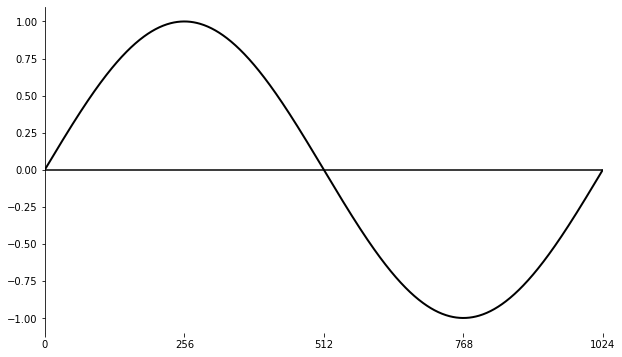

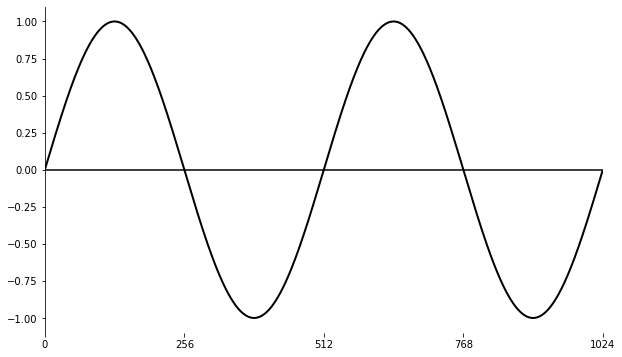

In [6]:
cs.plotTable(1)
cs.plotTable(2)

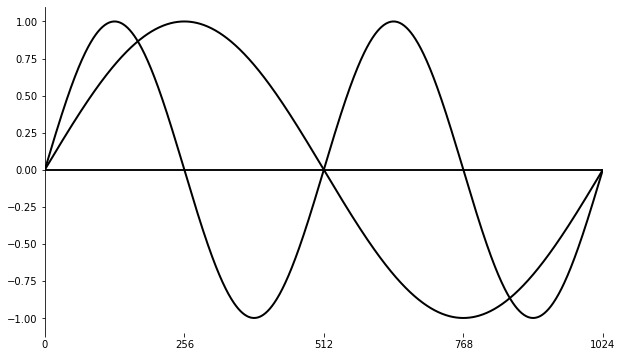

In [7]:
cs.plotTable(1)
cs.plotTable(2,reuse=True)

In [8]:
both = cs.table(1) + cs.table(2)

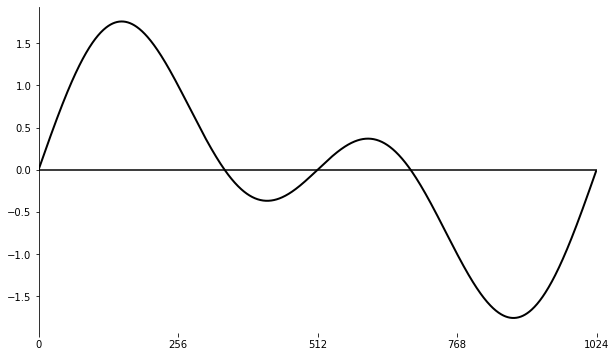

In [10]:
cs.fillTable(3,both)
cs.plotTable(3)

In [1]:
import PySimpleGUI as sg
%load_ext csoundmagics
cs = ICsound()

orc = """
instr 1
 Sfile chnget "file" 
 kVol chnget "vol"
 aSound[] diskin Sfile, 1, 0, 1
 kFadeOut linenr 1, .01, 1, .01
 out aSound[0]*kFadeOut*ampdb(kVol), aSound[1]*kFadeOut*ampdb(kVol)
endin
"""
cs.sendCode(orc)

layout = [
    [sg.Text('Select File, then Start/Stop')],
    [sg.FileBrowse(key='FILE', enable_events=True), 
     sg.Button('Start'), 
     sg.Button('Stop')],
    [sg.Slider(key='VOL',
               range=(-20,6),
               default_value=0,
               orientation='h',
               enable_events=True)]]

window = sg.Window('GUI -> Csound', layout)

while True:
    event, values = window.read()
    if event is None:
        cs.sendScore('i -1 0 1')
        del cs
        break
    cs.setStringChannel('file',values['FILE'])
    cs.setControlChannel('vol',values['VOL'])
    if event is 'Start':
        cs.sendScore('i 1 0 -1')
    if event is 'Stop':
        cs.sendScore('i -1 0 1')

window.close()

Csound engine started at slot#: 1.


In [2]:
import PySimpleGUI as sg
%load_ext csoundmagics
cs = ICsound()
orc = """
seed 0
instr 1
 kLine randomi -1,1,1,3
 chnset kLine, "line"
endin
"""
cs.sendCode(orc)
cs.sendScore('i 1 0 -1')

layout = [[sg.Slider(range=(-1,1),
                     orientation='h',
                     key='LINE',
                     resolution=.01)],
          [sg.Text(size=(6,1),
                   key='LINET',
                   text_color='black',
                   background_color='white',
                   justification = 'right',
                   font=('Courier',16,'bold'))]
         ]

window = sg.Window('Csound -> GUI',layout)

while True:
    event, values = window.read(timeout=100)
    if event is None:
        cs.sendScore('i -1 0 1')
        del cs
        break
    window['LINE'].update(cs.channel('line')[0])
    window['LINET'].update('%+.3f' % cs.channel('line')[0])
window.close()

The csoundmagics extension is already loaded. To reload it, use:
  %reload_ext csoundmagics
Csound engine started at slot#: 2.
